In [1]:
import musicntd.scripts.hide_code as hide

C:\Users\amarmore\AppData\Local\Continuum\anaconda3\envs\NTD_segmentation\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
C:\Users\amarmore\AppData\Local\Continuum\anaconda3\envs\NTD_segmentation\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


# Autosimilarity or barwise normalized autosimilarity?

In the 1st notebook, we presented the method to segment autosimilarity matrices.

Should autosimilarities be normalized barwise ?

In our opinion, yes. Indeed, when normalizing the autosimilairty matrices, the diagonal (representing self-similarities of bars) is entirely composed of elements equal to one, which seems convenient for self-similarities. In the same time, normalizing can help reduce disperancies in intensity between bars, which seems desirable to compare them.

In that sense, future autosimilarities are considered normalized barwise, even if not specified.

# How to handle the chromas information?

Classically, $W$ factor matrix should be treated as the other matrices and be optimized in the algorithm.

But, in this context, it represents chromas information, and each chroma represent a pitch-class in the western tonal scale. We could assume that, in general, 2 tones are never totally correlated on a song, even it may be false on particular examples. Under this assumption, the perfect decomposition of this mode could be to have 12 columns perfectly decorrelated, and so, a matrix where each column represent one and unique chroma, which is the identity matrix, with potentially a column permutation.

Even if tones appear to be correlated, fixing $W$ to the identity matrix wouldn't be a problem as they could be mixed in musical patterns in the core tensor.

In that sense, fixing $W$ to the identity matrix (denoted Id12 in figures) could reduce complexity of the NTD algortihm, without losing compressibility capacity.

Though, this assumption need to be validated, and this is the goal of experiments below.

## Comparison on an example: "1.wav" from RWC Pop

Below are represented the factors matrices resulting of NTD when $W$ is fixed at the identity (left) and when $W$ is optimized as every mode (right).

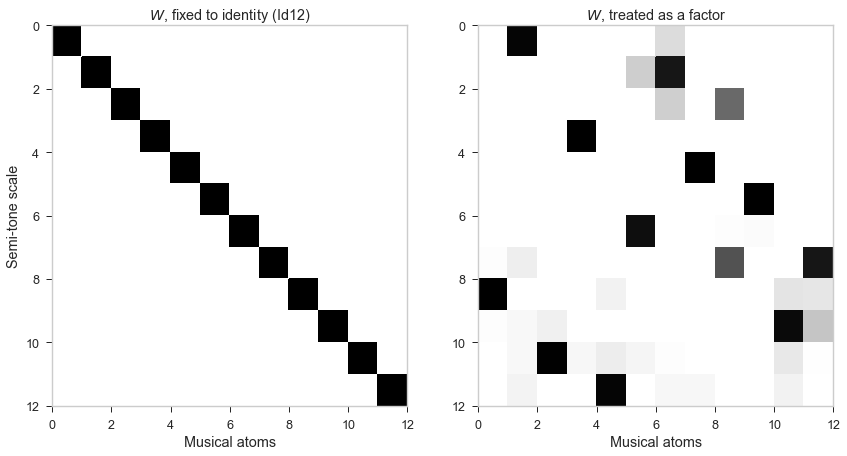

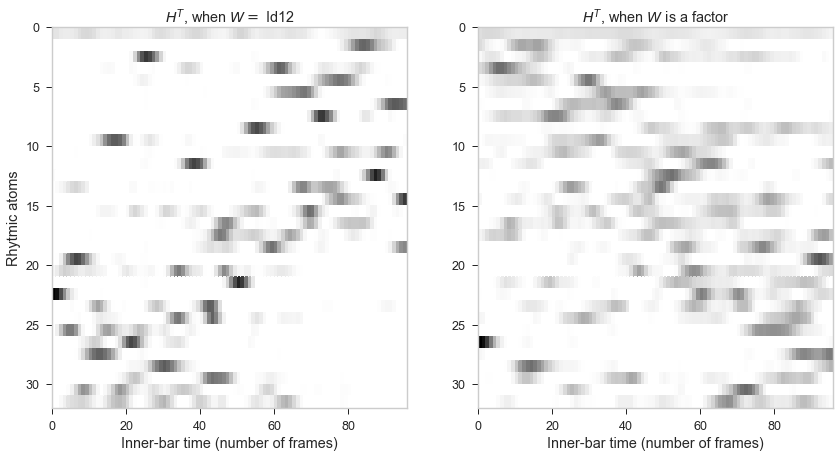

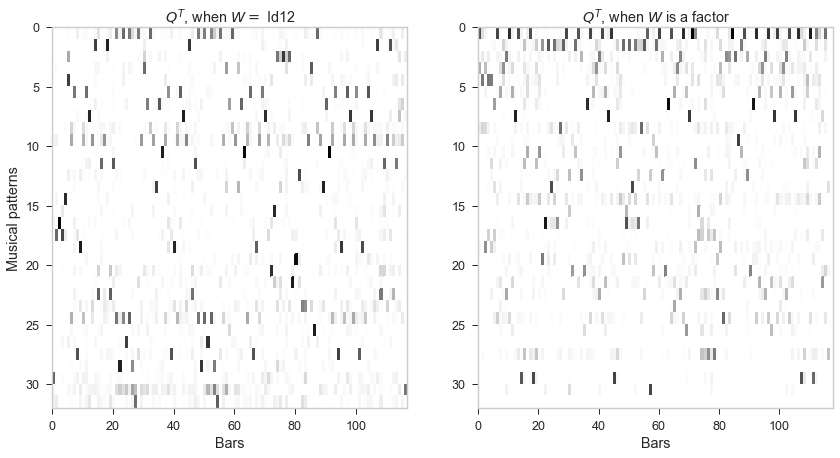

c:\users\amarmore\desktop\projects\phd main projects\on git\code\tensor factorization\musicntd\autosimilarity_segmentation.py:43: RuntimeWarning: invalid value encountered in true_divide
  this_array = np.array([list(i/np.linalg.norm(i)) for i in this_array.T]).T


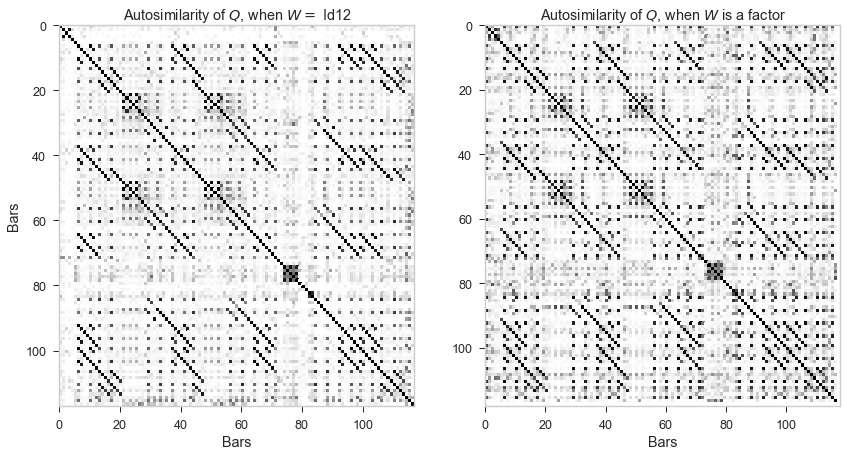

In [2]:
ranks = [12,32,32]
hide.compare_chromas_tucker_decomp("1", ranks)

## Computation on the entire RWC with several ranks

To decide between fixing $W$ or optimizing it as the other modes, we decided to compare segmentation results on the entire RWC Pop dataset, with different ranks for $H$ and $Q$ (16 and 32).

In [3]:
ranks_rhythm = [16,32]
ranks_pattern = [16,32]
annotations_type = "MIREX10"

These results are presented below, respectively with 0.5 seconds and 3 seconds tolerance windows.

### Fixing $W$ to Id12

In [4]:
zero_five_chr, three_chr = hide.compute_ranks_RWC(ranks_rhythm,ranks_pattern, W = "chromas", annotations_type = annotations_type, penalty_weight = 0)

### Optimizing $W$ with the other modes

In [5]:
zero_five_tk, three_tk = hide.compute_ranks_RWC(ranks_rhythm,ranks_pattern, W = "tucker", annotations_type = annotations_type, penalty_weight = 0)

Note: these results don't come from the original computation (as it was lost in the meantime), and so come from the last version of the algorithm (at this time), which explains why they may differ from the ones obtained in the 1st notebook.

# Conclusion

 - As previously stated, we decided to normalize barwise our autosimilarities.
 - Regarding $W$, we decided to fix $W$ to the 12-size identity matrix. Indeed, in addition of a little gain in segmentation scores (as shown above in tables), fixing $W$ to the identity result in a gain in complexity and computation time, as well as more interpretable results (as we ensure that each column of $W$ represents one and only one semi-tone). 